In [ ]:
#Insatlling needed python packages

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
#Importing Market Cap file
stk_mrkcap = pd.read_csv(r"C:/Users/nairr/Python Codes Practice/Dataset/Market Cap.csv")
#Moving the company names into a series. 
comp_name = stk_mrkcap['Company'].head(10)
#Taking top 15 records into another dataframe
stk_top5 = stk_mrkcap.head(15)


In [ ]:
#Opening Investing.com and signing into the website
driver = webdriver.Chrome()
#driver.implicitly_wait(10)
driver.get("https://in.investing.com/")
driver.find_element_by_xpath("//*[@id='userAccount']/div/a[1]").click()
driver.find_element_by_xpath("//*[@id='loginFormUser_email']").send_keys('abcd@gmail.com')
driver.find_element_by_xpath("//*[@id='loginForm_password']").send_keys('abcd')
driver.find_element_by_xpath("//*[@id='signup']/a").click()


In [ ]:
#Use the company names in a for loop and download the all the files and rename it. 
path = 'C:/Users/nairr/Downloads/'
path1 = 'C:/Users/nairr/Python Codes Practice/Market Cap/'
for comp in comp_name:
    driver.find_element_by_xpath("/html/body/div[5]/header/div[1]/div/div[3]/div[1]/input").send_keys(comp + Keys.ENTER)
    driver.find_element_by_xpath('//*[@id="fullColumn"]/div/div[2]/div[2]/div[1]/a[1]/span[3]').click()
    driver.find_element_by_xpath('//*[@id="pairSublinksLevel2"]/li[3]/a').click()
    time.sleep(10)
    driver.find_element_by_xpath('//*[@id="data_interval"]').click()  
    select_fr = Select(driver.find_element_by_id("data_interval"))
    select_fr.select_by_index(2)
    driver.find_element_by_xpath("//*[@id='widgetFieldDateRange']").click()
    dtstrdt = driver.find_element_by_xpath("//*[@id='startDate']")
    dtstrdt.clear()
    dtstrdt.send_keys('01/01/1993')
    driver.find_element_by_xpath("//*[@id='applyBtn']").click()
    time.sleep(10)
    driver.find_element_by_xpath('//*[@id="column-content"]/div[4]/div/a').click()
    time.sleep(10)
    file = os.listdir(path)
    os.rename(os.path.join(path, file[0]), os.path.join(path1,comp+'.csv'))

In [ ]:
Cagr_data = pd.DataFrame() 
Stk_Data = pd.DataFrame()
files = os.listdir(path1)
for f in files:
    Data = pd.read_csv(r'C:/Users/nairr/Python Codes Practice/Market Cap/'+f)
    Data['Company'] = f
    Data['Company'] = Data['Company'].replace('.csv','', regex=True)
    Data['Price'] = Data['Price'].replace(',','', regex=True).astype(float)
    Data['Curr_price'] = Data.iloc[0,1]
    Data['Old_price'] = Data.iloc[(len(Data)-1),1]
    Data['Quantity'] = 500 / Data['Old_price']
    Data['Current_Amount'] = (Data['Quantity'] * Data['Curr_price']).round(2)
    Data['Date'] = '01 ' + Data['Date']
    Data['Date'] = Data['Date'].replace(' ','-', regex=True)
    Data['Date'] = pd.to_datetime(Data['Date'])
    Data['year'] = Data['Date'].dt.year 
    Data['Growth_Period'] = int((Data.iloc[0,12]) - (Data.iloc[(len(Data)-1),12]))
    Data['CAGR %'] = (((Data['Current_Amount']/500)**(1/Data['Growth_Period']) - 1)*100).round(2)
    Stk_Data = pd.concat([Stk_Data,Data])
    Cagr_data = pd.concat([Cagr_data,Data.head(1)]).sort_values('CAGR %',ascending=False)
    Cagr_data.drop(Cagr_data.columns[[2,3,4,5,6,8,9,10,12]],axis=1,inplace =True)
Cagr_data.round(2)
Data

In [ ]:
stk_mrk = pd.merge(Stk_Data,stk_top5, on ='Company')
cols = [8,9,10,11,12,13,14,15,16,17]
stk_mrk.drop(stk_mrk.columns[cols],axis=1,inplace =True)
stk_mrk['Market Cap'] = (stk_mrk['Price']).astype(float) * (stk_mrk['Outstanding Shares Cr.']).astype(float)
stk_mrk.sort_values(['Date'],ascending=False,inplace=True)
sam = stk_mrk
sam.drop(sam.columns[[1,2,3,4,5,6,8]],axis=1,inplace =True)
samgp = sam.groupby('Company')

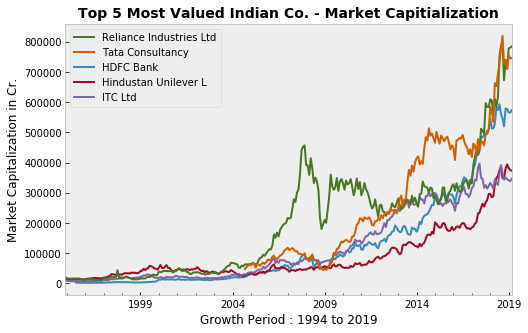

In [178]:
%matplotlib inline
style.use('bmh')
fig, ax = plt.subplots(figsize=(8,5))
for label, df in samgp:
    df.plot(x='Date',y='Market Cap',ax=ax,label=label)
ax.grid(False)
plt.title('Top 5 Most Valued Indian Co. - Market Capitialization',fontsize=14,fontweight='bold')
plt.xlabel('Growth Period : 1994 to 2019', fontsize=12)
plt.ylabel('Market Capitalization in Cr.', fontsize=12)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[4], handles[0],handles[1],handles[2]]
labels = [labels[3], labels[4], labels[0], labels[1], labels[2]]
ax.legend(handles,labels,loc='upper left')
plt.show()

In [ ]:
#a = stk_top5
#a.drop(a.columns[[1,3,4,5,7,8,9]],axis=1,inplace =True)
stk_top5

In [ ]:
for a, b in samgp:
    print (b[b.Company=='Reliance Industries Ltd'])

In [ ]:
#Interesting Statistics

#stk_mrkcap.drop(stk_mrkcap.index[[100,101]],inplace=True)

stk_mrkcap['Market Cap'] = stk_mrkcap['Last Price'] * stk_mrkcap['Outstanding Shares Cr.']
Tot_Mrk_Cap = stk_mrkcap['Market Cap'].sum()
Top15_Mrk_cap = stk_mrkcap['Market Cap'].head(15).sum()
Top15per = (Top15_Mrk_cap/Tot_Mrk_Cap)*100

Top5_Mrk_cap = stk_mrkcap['Market Cap'].head(10).sum()
Top2_Mrk_cap = stk_mrkcap['Market Cap'].head(3).sum()
Top2of5per = Top2_Mrk_cap / Top5_Mrk_cap 

#Reliance_Mrkcap = stk_mrkcap.iloc[0,10]
#Abb_Mrkcap = stk_mrkcap.iloc[99,10]
#DiffTop100_Top1 = (Reliance_Mrkcap - Abb_Mrkcap)/(Reliance_Mrkcap)

#stk_mrkcap
#DiffTop100_Top1
#Stk_Data

print(Top2of5per)
print(Top15per)

In [ ]:
a = pd.unique(Stk_Data[['Company','Curr_price','Old_price','Curr_Amount','Growth_Period','CAGR']].values.ravel())
a